## 0) Environment check

In [22]:
# Imports (run once)
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

from skimage import data  # provides sample images (offline)

print("OpenCV:", cv2.__version__)


OpenCV: 4.13.0


## Helper functions

In [23]:
def to_rgb(img_bgr_or_rgb):
    """Ensure image is RGB uint8."""
    if img_bgr_or_rgb is None:
        raise ValueError("Image is None. Check the path or loading step.")
    img = img_bgr_or_rgb
    if img.ndim == 2:
        return img
    # If it came from cv2.imread it's BGR; if from skimage it's RGB.
    # We detect by heuristic: assume cv2 format if loaded via cv2.imread.
    return img

def load_image(path=None):
    """Load an RGB image. If path is missing, fall back to a built-in sample."""
    if path and os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
        if bgr is None:
            raise ValueError(f"Failed to read: {path}")
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        return rgb
    # offline sample (RGB)
    return data.astronaut()

def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(img1, cmap=cmap1); plt.title(title1); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img2, cmap=cmap2); plt.title(title2); plt.axis('off')
    plt.axis('off')
    plt.show()

def clip_uint8(x):
    """Clip and convert to uint8."""
    return np.clip(x, 0, 255).astype(np.uint8)


## 1) Load an image

Image shape (H, W, C): (300, 300, 3) | dtype: uint8


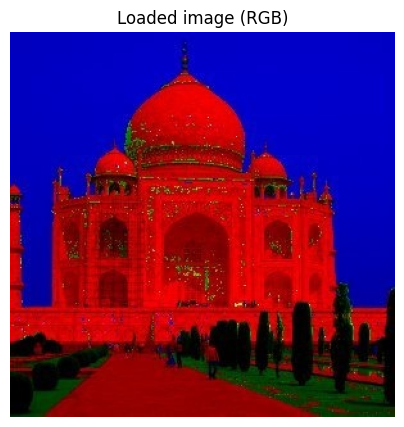

In [24]:
IMAGE_PATH = "/content/color-taj-maxrgb.jpg"  # or "fruit basket.jpg"

img = load_image(IMAGE_PATH)
print("Image shape (H, W, C):", img.shape, "| dtype:", img.dtype)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.show()

## 2) Image I/O Basics

### Task 2.1) print two pixel values

In [25]:
# Get image dimensions
h, w = img.shape[:2]

# 1. Access the top-left pixel
top_left = img[0, 0]

# 2. Access the center pixel
center_pixel = img[h//2, w//2]

print("Top-left pixel (row=0, col=0):", top_left)
print("Center pixel (row={}, col={}):".format(h//2, w//2), center_pixel)

Top-left pixel (row=0, col=0): [  1   0 190]
Center pixel (row=150, col=150): [134   1   2]


The three numbers represent the intensity of the Red, Green, and Blue (RGB) color channels. Each value is an 8-bit integer ranging from 0 (no intensity) to 255 (maximum intensity).

### Task 2.2) Save and re-load

Original shape: (300, 300, 3) | Original dtype: uint8
Reloaded shape: (300, 300, 3) | Reloaded dtype: uint8


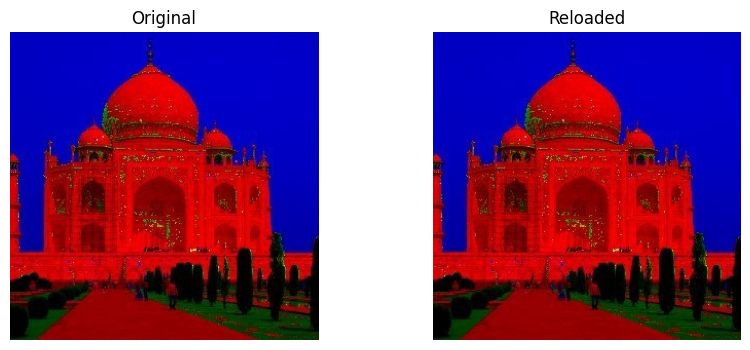

In [26]:
out_path = "output_saved.png"

bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)

reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Original shape:", img.shape, "| Original dtype:", img.dtype)
print("Reloaded shape:", reloaded_rgb.shape, "| Reloaded dtype:", reloaded_rgb.dtype)


show_side_by_side(img, reloaded_rgb, "Original", "Reloaded")

Manual thresholding uses a fixed value regardless of the image content, which can fail if lighting is uneven. Otsu's method is more robust because it automatically calculates the optimal threshold by analyzing the image histogram to separate background and foreground pixels.

## Task 3) Grayscale and binary images

### Task 3.1) Convert to grayscale

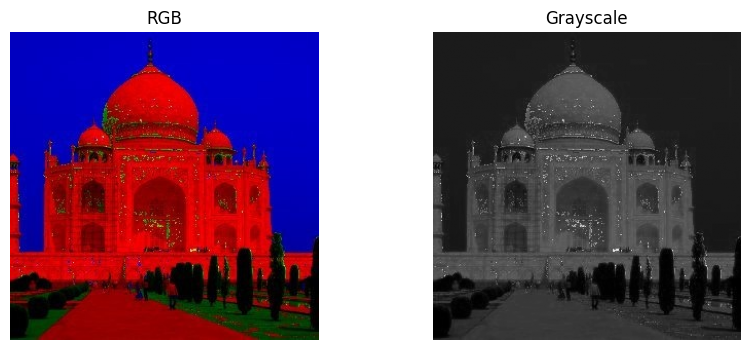

Gray shape: (300, 300) | dtype: uint8


In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

show_side_by_side(img, gray, "RGB", "Grayscale", cmap2="gray")

print("Gray shape:", gray.shape, "| dtype:", gray.dtype)

### Task 3.2 — Threshold to binary

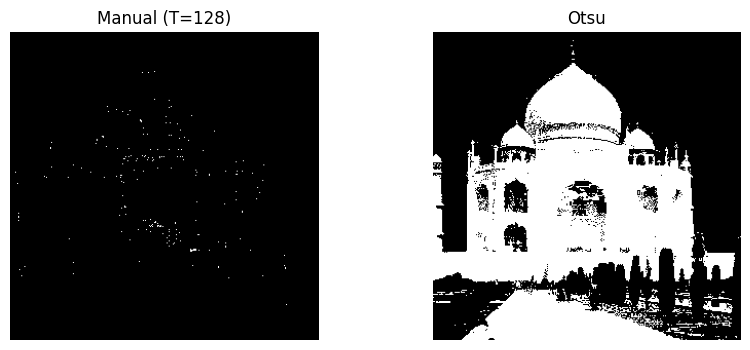

Otsu threshold chosen by OpenCV: 40.0


In [28]:
th_manual = 128
_, binary_manual = cv2.threshold(gray, th_manual, 255, cv2.THRESH_BINARY)

threshold_val, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_side_by_side(binary_manual, binary_otsu, f"Manual (T={th_manual})", "Otsu", cmap1="gray", cmap2="gray")
print("Otsu threshold chosen by OpenCV:", threshold_val)

## 4) Cropping (ROI)

### Task 4.1 — Crop a region of interest


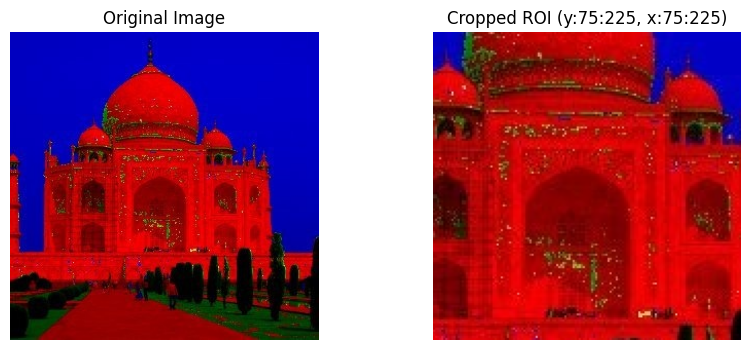

Original shape: (300, 300, 3)
ROI shape: (150, 150, 3)


In [29]:
h, w = img.shape[:2]

x1, y1 = int(0.25 * w), int(0.25 * h)
x2, y2 = int(0.75 * w), int(0.75 * h)

roi = img[y1:y2, x1:x2].copy()

show_side_by_side(img, roi, "Original Image", f"Cropped ROI (y:{y1}:{y2}, x:{x1}:{x2})")

print("Original shape:", img.shape)
print("ROI shape:", roi.shape)

Task 4.2)
Row = Y: The first number tells the computer which line to go to (Vertical).

Column = X: The second number tells it how far to move along that line (Horizontal).

So, img[y, x] just means Go to Row Y, then Column X.

## 5) Color spaces



### Task 5.1 — Convert RGB to HSV and visualize channels


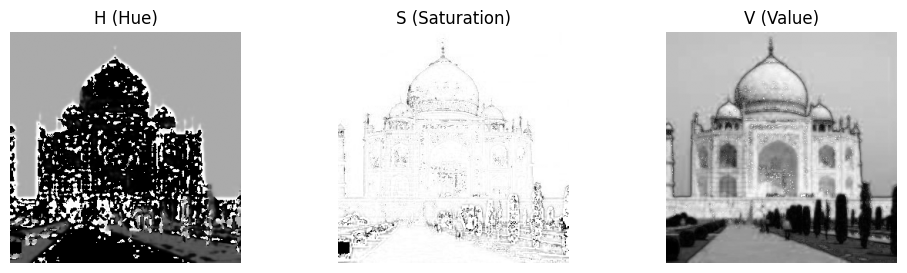

In [30]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

H, S, V = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

plt.figure(figsize=(12,3))
for i, (ch, name) in enumerate([(H,"H (Hue)"), (S,"S (Saturation)"), (V,"V (Value)")], start=1):
    plt.subplot(1,3,i)
    plt.imshow(ch, cmap="gray")
    plt.title(name)
    plt.axis("off")
plt.show()

## Task 6

### 6.1 Subtracting an intensity (darkening)

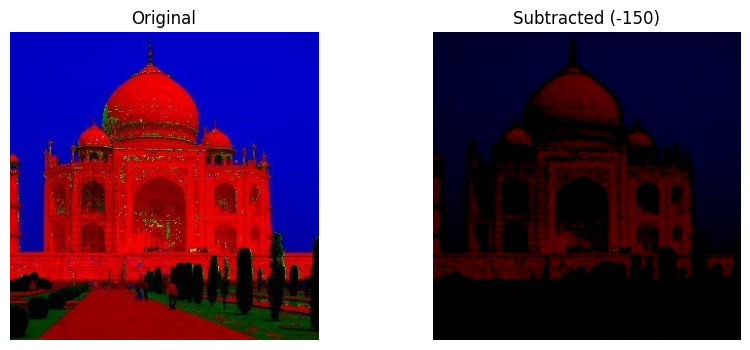

In [31]:

sub_val = 150
img_sub = cv2.subtract(img, sub_val)

show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")

The image gets darker because we are decreasing the intensity values of the pixels; many pixels eventually "clip" at 0 (pure black).

### 6.2) subtract from Red channel only

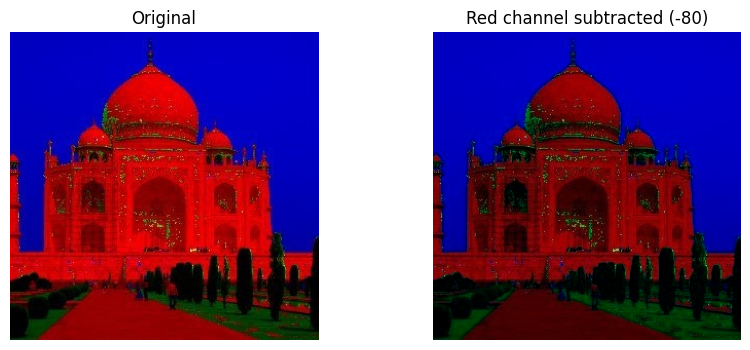

In [32]:
sub_val_r = 80

img_red_only = img.copy()

img_red_only[:,:,0] = cv2.subtract(img_red_only[:,:,0], sub_val_r)

show_side_by_side(img, img_red_only, "Original", f"Red channel subtracted (-{sub_val_r})")

### 6.3 Adding an intensity (brightening)

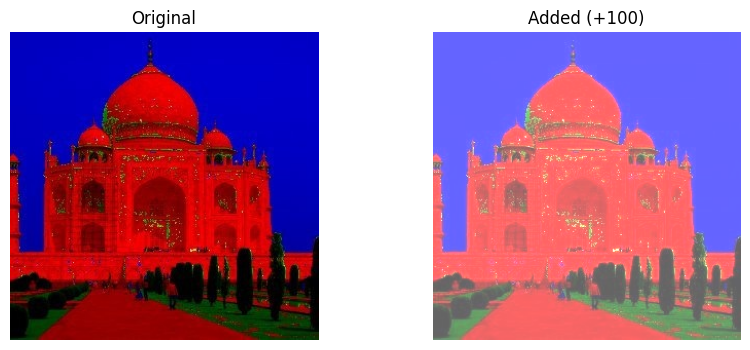

In [33]:
add_val = 100
img_add = cv2.add(img, add_val)

show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")

1) As add_val increases, the image becomes lighter and eventually "washed out".
2) The image gets brighter because we are increasing pixel intensities; many pixels reach the maximum value of 255 (pure white).

### 6.4) add to Red channel only

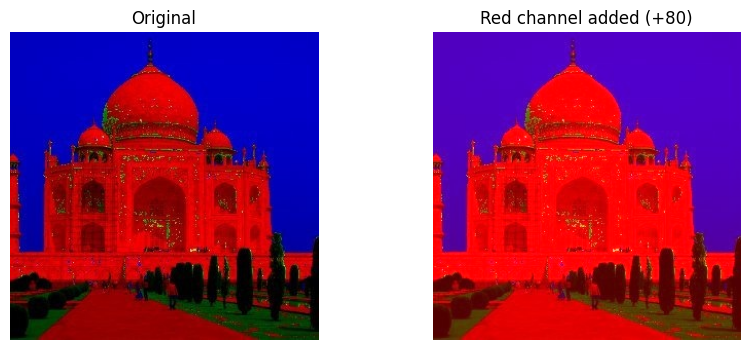

In [34]:

add_val_r = 80

img_red_only_add = img.copy()

img_red_only_add[:,:,0] = cv2.add(img_red_only_add[:,:,0], add_val_r)

show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")

### 6.5 Multiplying by a constant (contrast/brightness change)


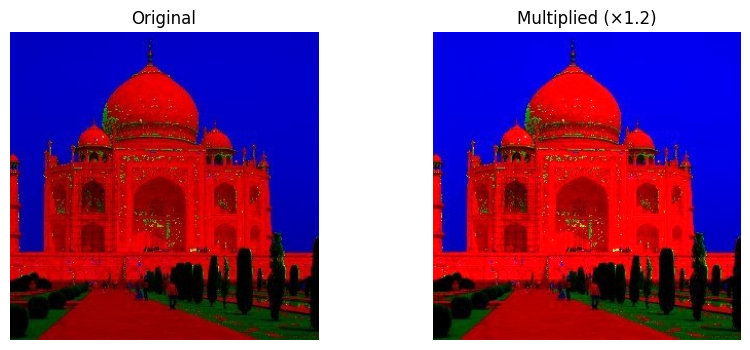

In [35]:
factor = 1.2

img_f = img.astype(np.float32)

img_mul = clip_uint8(img_f * factor)

show_side_by_side(img, img_mul, "Original", f"Multiplied (×{factor})")

Multiplying by a factor > 1 increases the contrast and brightness, but can cause highlights to saturate (turn white). Multiplying by a factor < 1 scales all intensities down, effectively darkening the image while maintaining the relative difference between light and dark areas.

### 6.6 Dividing by a constant


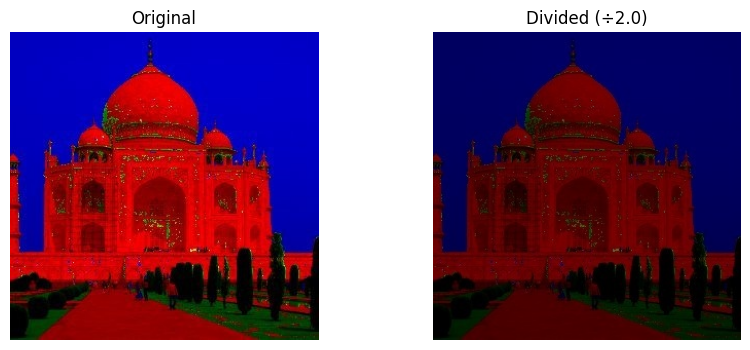

In [36]:
divisor = 2.0

img_f = img.astype(np.float32)

img_div = clip_uint8(img_f / divisor)

show_side_by_side(img, img_div, "Original", f"Divided (÷{divisor})")

## 7) Mini-report

In this assignment, I learned how to manipulate digital images using OpenCV and NumPy. I explored how images are represented as multidimensional arrays and the importance of data types like `uint8` vs `float32`.

The most useful operations I performed were Otsu’s thresholding and HSV conversion. Otsu’s is particularly helpful because it eliminates the guesswork of choosing a manual threshold. Converting to the HSV color space was insightful because it separates color information (Hue) from brightness (Value), which is much more effective for image processing tasks than the standard RGB format.

One major issue I encountered was the difference in color channel ordering; OpenCV reads images in BGR, while Matplotlib displays them in RGB. Forgetting to convert these results in distorted colors. Additionally, I learned that using `cv2.add` and `cv2.subtract` is safer than standard Python arithmetic because OpenCV automatically handles "saturation," preventing values from wrapping around.